# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [2]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as fernanda.colorado1@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2025.2
success!! you are logged in
-------------


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [3]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 38, 24, 37, 46],
       [ 2, 88, 55, 97, 25],
       [ 3, 26, 76, 92, 69],
       [ 4, 40, 26, 39, 72],
       [ 5, 48, 69,  9, 75],
       [ 6, 44, 60, 70, 35],
       [ 7, 68, 46, 31, 85],
       [ 8, 81, 33, 14, 71],
       [ 9, 77, 40, 49, 30],
       [10, 17, 98, 97, 43],
       [11, 33, 37, 15, 55],
       [12, 84, 72, 63, 97],
       [13, 10, 40, 39, 25],
       [14, 78, 79, 85, 58],
       [15,  0, 56, 86, 97],
       [16,  8, 65,  1, 61],
       [17, 37, 61, 20, 55],
       [18, 37, 51, 23, 70],
       [19, 91, 85, 14, 36]])

In [4]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 88, 55, 97, 25],
       [ 4, 40, 26, 39, 72],
       [ 5, 48, 69,  9, 75]])

In [5]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [38, 37],
       [88, 97],
       [26, 92],
       [40, 39],
       [48,  9],
       [44, 70],
       [68, 31],
       [81, 14],
       [77, 49],
       [17, 97],
       [33, 15],
       [84, 63],
       [10, 39],
       [78, 85],
       [ 0, 86],
       [ 8,  1],
       [37, 20],
       [37, 23],
       [91, 14]])

In [6]:
x[ridxs][:, cidxs]

array([[88, 97],
       [40, 39],
       [48,  9]])

and the dimensions of the array are accessible through `len` and `shape`

In [7]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [8]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 38, 24, 37, 46],
       [ 2, 88, 55, 97, 25]])

In [9]:
x[3:]

array([[ 3, 26, 76, 92, 69],
       [ 4, 40, 26, 39, 72],
       [ 5, 48, 69,  9, 75],
       [ 6, 44, 60, 70, 35],
       [ 7, 68, 46, 31, 85],
       [ 8, 81, 33, 14, 71],
       [ 9, 77, 40, 49, 30],
       [10, 17, 98, 97, 43],
       [11, 33, 37, 15, 55],
       [12, 84, 72, 63, 97],
       [13, 10, 40, 39, 25],
       [14, 78, 79, 85, 58],
       [15,  0, 56, 86, 97],
       [16,  8, 65,  1, 61],
       [17, 37, 61, 20, 55],
       [18, 37, 51, 23, 70],
       [19, 91, 85, 14, 36]])

we can do the same thing with vectors

In [10]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [11]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [12]:
np.random.permutation(v)

array([104, 100, 110, 103, 111, 108, 113, 117, 118, 101, 112, 105, 102,
       116, 119, 109, 107, 106, 115, 114])

or the first natural numbers

In [13]:
p = np.random.permutation(20)
p

array([ 8, 18,  7,  5, 10,  6, 11,  9, 17, 12,  3, 15,  0, 13, 19, 16,  4,
        1, 14,  2])

how do you interpret this?

In [14]:
v[p[5:]]

array([106, 111, 109, 117, 112, 103, 115, 100, 113, 119, 116, 104, 101,
       114, 102])

In [15]:
x[p[:5]]

array([[ 8, 81, 33, 14, 71],
       [18, 37, 51, 23, 70],
       [ 7, 68, 46, 31, 85],
       [ 5, 48, 69,  9, 75],
       [10, 17, 98, 97, 43]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [16]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [19]:
import numpy as np

def split_data(X, y, pct):
    # Validaciones
    assert len(X) == len(y), "X and y must have the same length"
    assert pct > 0 and pct < 1, "pct must be in the (0,1) interval"

    # 1️⃣ Crear permutación aleatoria de índices
    permutation = np.random.permutation(len(X))

    # 2️⃣ Calcular cantidad de elementos para el primer conjunto
    n1_elements = int(len(X) * pct)

    # 3️⃣ Dividir índices según porcentaje
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]

    # 4️⃣ Crear los subconjuntos de datos
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]

    # 5️⃣ Retornar resultados
    return X1, X2, y1, y2


check your solution manually with the following code

In [20]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 69 60 74 44 59 24 71]
 [ 2 46  3 90 36  3 53 38]
 [ 3 52 12 50 67 55 50 72]
 [ 4 39  1 83 70  9 60  5]
 [ 5 51 56 49 63 91 38 82]
 [ 6 40 92 64 76 93 35 58]
 [ 7 52 68 77 85 52 89 62]
 [ 8 95 88 12 40 71 76 24]
 [ 9 45  9 80 72 37  9 74]
 [10 34 78 62 62 37 64 94]
 [11 10 70 33 60  1 77 11]
 [12 39 13 62 94 98 40 50]
 [13 59 41 44 11 74 67 34]
 [14 25 31 46 26 70 47 83]
 [15 35 72 45 56 24 15 96]
 [16 28 60 81 44 21 54 35]
 [17 96 78 76 59 25 81 50]
 [18 29 63 19 72 75 36  6]
 [19 61 28  8 33 16 80 69]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [21]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [22]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(np.int64(7091), np.int64(7091), np.int64(2190), np.int64(2190))

In [23]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[16 28 60 81 44 21 54 35]
 [ 3 52 12 50 67 55 50 72]
 [ 8 95 88 12 40 71 76 24]
 [17 96 78 76 59 25 81 50]
 [ 2 46  3 90 36  3 53 38]
 [ 7 52 68 77 85 52 89 62]
 [ 1 69 60 74 44 59 24 71]
 [ 0  1  2  3  4  5  6  7]
 [18 29 63 19 72 75 36  6]
 [ 9 45  9 80 72 37  9 74]
 [ 4 39  1 83 70  9 60  5]
 [10 34 78 62 62 37 64 94]
 [ 5 51 56 49 63 91 38 82]
 [11 10 70 33 60  1 77 11]] 
--
[[13 59 41 44 11 74 67 34]
 [12 39 13 62 94 98 40 50]
 [19 61 28  8 33 16 80 69]
 [15 35 72 45 56 24 15 96]
 [14 25 31 46 26 70 47 83]
 [ 6 40 92 64 76 93 35 58]] 
--
[116 103 108 117 102 107 101 100 118 109 104 110 105 111] 
--
[113 112 119 115 114 106] 
--


In [24]:
Xts

array([[13, 59, 41, 44, 11, 74, 67, 34],
       [12, 39, 13, 62, 94, 98, 40, 50],
       [19, 61, 28,  8, 33, 16, 80, 69],
       [15, 35, 72, 45, 56, 24, 15, 96],
       [14, 25, 31, 46, 26, 70, 47, 83],
       [ 6, 40, 92, 64, 76, 93, 35, 58]])

**submit your code**

In [25]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [26]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


In [27]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

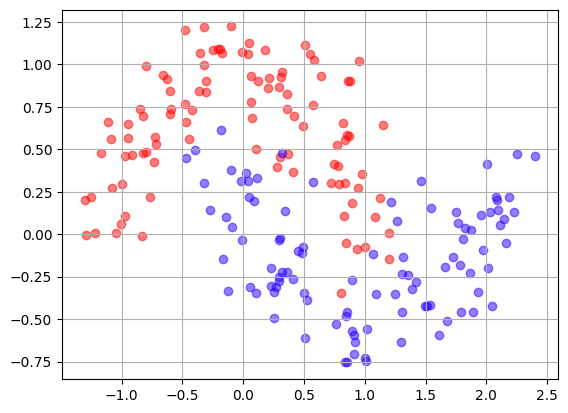

In [28]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(np.float64(0.4587), np.float64(0.5413))

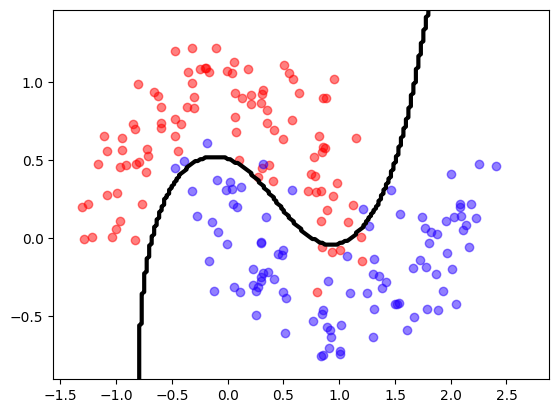

In [29]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [30]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"

    predictions = ...

    return estimator, predictions

In [31]:
def fit_and_predict(estimator, X, y):
    assert len(X) == len(y), "X and y must have the same length"

    # Número total de muestras
    n = len(X)

    # Punto de corte (mitad del dataset)
    mid = n // 2

    # Si n es impar, la segunda mitad tendrá un elemento más
    X_train, y_train = X[:mid], y[:mid]
    X_test, y_test = X[mid:], y[mid:]

    # Entrenamos el modelo con la primera mitad
    estimator.fit(X_train, y_train)

    # Hacemos predicciones sobre la segunda mitad
    predictions = estimator.predict(X_test)

    return estimator, predictions


check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [32]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [33]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [34]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [35]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[2 7 7 0 5 3 5 4 6 1 1 4 8 7 3]


In [36]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True False False  True False  True False  True False  True  True  True
 False False  True]


and how we can select elements of a vector using a boolean vector of the same length

In [37]:
y[y_less_than_5]

array([2, 0, 3, 4, 1, 1, 4, 3])

In [38]:
y[y<5]

array([2, 0, 3, 4, 1, 1, 4, 3])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [39]:
v = np.random.randint(20, size=15)
v

array([15, 14, 15,  4,  0, 10,  8, 13, 18,  4,  1, 13, 11, 15, 11])

In [40]:
v[y<5]

array([15,  4, 10, 13,  4,  1, 13, 11])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    X1 =
    X2 =
    return X1, X2

In [41]:
def select_per_class(X, y):
    # Selecciona las filas donde y == 0
    X1 = X[y == 0]

    # Selecciona las filas donde y == 1
    X2 = X[y == 1]

    return X1, X2


check manually your code

In [42]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [43]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [44]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [46]:
def accuracy(y_true, y_pred):
    # Verificar que ambos vectores tengan la misma longitud
    assert len(y_true) == len(y_pred), "Los vectores deben tener la misma longitud"

    # Calcular la proporción de elementos iguales
    result = np.sum(y_true == y_pred) / len(y_true)

    return result


In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

**submit your code**

In [47]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [49]:
import numpy as np

def split_fit_predict(estimator, X, y, train_pct):

    # --- función interna para dividir los datos ---
    def split_data(X, y, pct):
        assert len(X) == len(y), "X and y must have the same length"
        assert 0 < pct < 1, "pct must be in (0,1)"

        permutation = np.random.permutation(len(X))
        n1_elements = int(len(X) * pct)
        p1 = permutation[:n1_elements]
        p2 = permutation[n1_elements:]

        X1 = X[p1]
        X2 = X[p2]
        y1 = y[p1]
        y2 = y[p2]
        return X1, X2, y1, y2

    # --- función interna para calcular la precisión ---
    def accuracy(y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    # --- dividir, ajustar y predecir ---
    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)

    estimator.fit(Xtr, ytr)
    y_pred = estimator.predict(Xts)
    acc = accuracy(yts, y_pred)

    return estimator, Xts, yts, acc


In [50]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 0.34232879, -0.13972568],
        [ 2.2027941 ,  0.1567548 ],
        [ 0.06836307,  0.76879685],
        [ 0.58107983,  1.15959385],
        [ 1.37182696, -0.56563446],
        [-0.28665182,  1.27888475],
        [ 0.64584902,  0.69603655],
        [ 0.26588409, -0.28847036],
        [ 1.72133018, -0.62093239],
        [ 0.84774028, -0.69784898]]),
 array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1]),
 np.float64(0.9))

**submit your code**

In [51]:
student.submit_task(globals(), task_id="task_05");
